# Import Libraries and Load Dataset

In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
data1 = pd.read_csv('https://raw.githubusercontent.com/willyrizkiyan/EDA-and-imdb-rating-prediction/main/imdb%20html.csv', sep=';')
data2 = pd.read_csv('https://raw.githubusercontent.com/willyrizkiyan/EDA-and-imdb-rating-prediction/main/imdb%20json.csv', sep=';')
data_actor = pd.read_csv('https://raw.githubusercontent.com/willyrizkiyan/eda-and-imdb-rating-prediction/main/actor%20rank.csv', sep='\t')

# Data Preparation

In [236]:
data1.head()

,Url,Title,Year,Rate,Votes,Genre,Certificate,Duration,People,Nudity,Violence,Profanity,Alcohol,Frightening
0,/title/tt2488496/,Star Wars: Episode VII - The Force Awakens,2015,7.8,"918,325","Action, Adventure, Sci-Fi",PG-13,138,"\n \nJ.J. Abrams\n| \n\nDaisy Ridley, \nJoh...",None,Moderate,Mild,None,Moderate
1,/title/tt4154796/,Avengers: Endgame,2019,8.4,"1,082,885","Action, Adventure, Drama",PG-13,181,"\n \nAnthony Russo, \nJoe Russo\n| \n\nRobe...",None,Moderate,Mild,Mild,Moderate
2,/title/tt10872600/,Spider-Man: No Way Home,2021,8.3,"694,209","Action, Adventure, Fantasy",PG-13,148,"\n \nJon Watts\n| \n\nTom Holland, \nZenday...",None,Moderate,Mild,None,Moderate
3,/title/tt0499549/,Avatar,2009,7.8,"1,214,008","Action, Adventure, Fantasy",PG-13,162,"\n \nJames Cameron\n| \n\nSam Worthington, ...",Mild,Moderate,Moderate,Mild,Moderate
4,/title/tt1825683/,Black Panther,2018,7.3,"736,095","Action, Adventure, Sci-Fi",PG-13,134,"\n \nRyan Coogler\n| \n\nChadwick Boseman, ...",None,Moderate,Mild,None,Moderate


In [237]:
data2.head()

,url_id,certificate,year,duration,rating,votes,metascore,total_nominations,total_wins,oscar_nominations,oscar_wins,budget,gross_us_canada,opening_weekend_gross_us_canada,worldwide_gross,aspect_ratio,color,url_image,plot
0,tt2488496,PG-13,2015,8280.0,7.8,918286,80.0,138,62,5.0,0.0,245000000.0,936662225.0,247966675.0,2.069522e+09,2.39 : 1,Color,https://m.media-amazon.com/images/M/MV5BOTAzOD...,"As a new threat to the galaxy rises, Rey, a de..."
1,tt4154796,PG-13,2019,10860.0,8.4,1082847,78.0,132,70,1.0,0.0,356000000.0,858373000.0,357115007.0,2.797501e+09,NaN,NaN,https://m.media-amazon.com/images/M/MV5BMTc5MD...,After the devastating events of Avengers: Infi...
2,tt10872600,PG-13,2021,8880.0,8.3,694144,71.0,56,32,1.0,0.0,200000000.0,804793477.0,260138569.0,1.901233e+09,NaN,Color,https://m.media-amazon.com/images/M/MV5BZWMyYz...,"With Spider-Man's identity now revealed, Peter..."
3,tt0499549,PG-13,2009,9720.0,7.8,1213944,83.0,131,89,6.0,3.0,237000000.0,760507625.0,77025481.0,2.847397e+09,NaN,Color,https://m.media-amazon.com/images/M/MV5BZDA0OG...,A paraplegic Marine dispatched to the moon Pan...
4,tt1825683,PG-13,2018,8040.0,7.3,736083,88.0,281,116,4.0,3.0,200000000.0,700426566.0,202003951.0,1.347598e+09,2.39 : 1,NaN,https://m.media-amazon.com/images/M/MV5BMTg1MT...,"T'Challa, heir to the hidden but advanced king..."


In [238]:
data_actor.head()

,rank_actor,actor,box_office_actor,movies_actor,average_actor
0,1,Stan Lee,"30,606,129,162",49,"624,614,881"
1,2,Samuel L. Jackson,"27,703,132,819",139,"199,303,114"
2,3,Frank Welker,"17,443,260,126",112,"155,743,394"
3,4,John Ratzenberger,"16,769,039,846",52,"322,481,536"
4,5,Robert Downey Jr.,"15,728,895,535",67,"234,759,635"


## Prepare for merging dataframe

In [239]:
data1['Url'] = data1['Url'].str.replace('/','')
data1['Url'] = data1['Url'].str.replace('title','')
data1['Votes'] = data1['Votes'].str.replace(',','')

data1['People'] = data1['People'].str.replace('\n','')

data1[['Director', 'Star']] = data1['People'].str.split('|', 1, expand=True)
data1 = data1.rename(columns={'Url':'url_id'})
data1.columns= data1.columns.str.lower()
data1 = data1.drop('people', axis=1)

In [240]:
data1.head()

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,profanity,alcohol,frightening,director,star
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,7.8,918325,"Action, Adventure, Sci-Fi",PG-13,138,None,Moderate,Mild,None,Moderate,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhn..."
1,tt4154796,Avengers: Endgame,2019,8.4,1082885,"Action, Adventure, Drama",PG-13,181,None,Moderate,Mild,Mild,Moderate,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo,..."
2,tt10872600,Spider-Man: No Way Home,2021,8.3,694209,"Action, Adventure, Fantasy",PG-13,148,None,Moderate,Mild,None,Moderate,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, J..."
3,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,Moderate,Mild,Moderate,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weave..."
4,tt1825683,Black Panther,2018,7.3,736095,"Action, Adventure, Sci-Fi",PG-13,134,None,Moderate,Mild,None,Moderate,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita N..."


In [241]:
data2 = data2.drop('certificate', axis=1)
data2 = data2.drop('year', axis=1)
data2 = data2.drop('duration', axis=1)
data2 = data2.drop('rating', axis=1)
data2 = data2.drop('votes', axis=1)
data2 = data2.drop('metascore', axis=1)

In [242]:
data2.head()

,url_id,total_nominations,total_wins,oscar_nominations,oscar_wins,budget,gross_us_canada,opening_weekend_gross_us_canada,worldwide_gross,aspect_ratio,color,url_image,plot
0,tt2488496,138,62,5.0,0.0,245000000.0,936662225.0,247966675.0,2.069522e+09,2.39 : 1,Color,https://m.media-amazon.com/images/M/MV5BOTAzOD...,"As a new threat to the galaxy rises, Rey, a de..."
1,tt4154796,132,70,1.0,0.0,356000000.0,858373000.0,357115007.0,2.797501e+09,NaN,NaN,https://m.media-amazon.com/images/M/MV5BMTc5MD...,After the devastating events of Avengers: Infi...
2,tt10872600,56,32,1.0,0.0,200000000.0,804793477.0,260138569.0,1.901233e+09,NaN,Color,https://m.media-amazon.com/images/M/MV5BZWMyYz...,"With Spider-Man's identity now revealed, Peter..."
3,tt0499549,131,89,6.0,3.0,237000000.0,760507625.0,77025481.0,2.847397e+09,NaN,Color,https://m.media-amazon.com/images/M/MV5BZDA0OG...,A paraplegic Marine dispatched to the moon Pan...
4,tt1825683,281,116,4.0,3.0,200000000.0,700426566.0,202003951.0,1.347598e+09,2.39 : 1,NaN,https://m.media-amazon.com/images/M/MV5BMTg1MT...,"T'Challa, heir to the hidden but advanced king..."


## Merging Dataframe

In [243]:
data = data1.merge(data2, on='url_id', how = 'left')

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10172 entries, 0 to 10171
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           10172 non-null  object 
 1   title                            10172 non-null  object 
 2   year                             10172 non-null  int64  
 3   rate                             10172 non-null  object 
 4   votes                            10172 non-null  object 
 5   genre                            10172 non-null  object 
 6   certificate                      10172 non-null  object 
 7   duration                         10172 non-null  object 
 8   nudity                           10172 non-null  object 
 9   violence                         10172 non-null  object 
 10  profanity                        10172 non-null  object 
 11  alcohol                          10172 non-null  object 
 12  frightening       

## Change Column Type

In [245]:
data = data[data['rate']!='No Rate']
data = data[data['duration']!='None']

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10150 entries, 0 to 10171
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           10150 non-null  object 
 1   title                            10150 non-null  object 
 2   year                             10150 non-null  int64  
 3   rate                             10150 non-null  object 
 4   votes                            10150 non-null  object 
 5   genre                            10150 non-null  object 
 6   certificate                      10150 non-null  object 
 7   duration                         10150 non-null  object 
 8   nudity                           10150 non-null  object 
 9   violence                         10150 non-null  object 
 10  profanity                        10150 non-null  object 
 11  alcohol                          10150 non-null  object 
 12  frightening       

In [247]:
data['rate'] = data['rate'].astype('float64')
data['votes'] = data['votes'].astype('int')
data['duration'] = data['duration'].astype('int')

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10150 entries, 0 to 10171
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           10150 non-null  object 
 1   title                            10150 non-null  object 
 2   year                             10150 non-null  int64  
 3   rate                             10150 non-null  float64
 4   votes                            10150 non-null  int64  
 5   genre                            10150 non-null  object 
 6   certificate                      10150 non-null  object 
 7   duration                         10150 non-null  int64  
 8   nudity                           10150 non-null  object 
 9   violence                         10150 non-null  object 
 10  profanity                        10150 non-null  object 
 11  alcohol                          10150 non-null  object 
 12  frightening       

## Check Duplicated Data

In [249]:
data.duplicated().sum()

0

In [250]:
data['url_id'].value_counts()

tt0317705    8
tt0293508    6
tt1307068    4
tt1320082    4
tt0047296    3
            ..
tt0092105    1
tt0155975    1
tt0105629    1
tt0088001    1
tt1403177    1
Name: url_id, Length: 9736, dtype: int64

In [251]:
data['title'].value_counts()

The Phantom of the Opera    8
The Incredibles             8
The Concert                 4
Hamlet                      4
Hercules                    4
                           ..
Iron Will                   1
Flight of the Phoenix       1
The Air Up There            1
Ragtime                     1
Hesher                      1
Name: title, Length: 9442, dtype: int64

In [252]:
# url id and title has to be unique

data = data.drop_duplicates(subset=['url_id'])
data = data.drop_duplicates(subset=['title'])

## Check Missing Value

In [253]:
data.isna().sum()

url_id                                0
title                                 0
year                                  0
rate                                  0
votes                                 0
genre                                 0
certificate                           0
duration                              0
nudity                                0
violence                              0
profanity                             0
alcohol                               0
frightening                           0
director                              0
star                                  2
total_nominations                     0
total_wins                            0
oscar_nominations                  7437
oscar_wins                         7437
budget                             2517
gross_us_canada                     728
opening_weekend_gross_us_canada    1772
worldwide_gross                    1077
aspect_ratio                        634
color                              1378


In [254]:
data['oscar_nominations'] =  data['oscar_nominations'].fillna(0)
data['oscar_wins'] =  data['oscar_wins'].fillna(0)

In [255]:
data.isna().sum()

url_id                                0
title                                 0
year                                  0
rate                                  0
votes                                 0
genre                                 0
certificate                           0
duration                              0
nudity                                0
violence                              0
profanity                             0
alcohol                               0
frightening                           0
director                              0
star                                  2
total_nominations                     0
total_wins                            0
oscar_nominations                     0
oscar_wins                            0
budget                             2517
gross_us_canada                     728
opening_weekend_gross_us_canada    1772
worldwide_gross                    1077
aspect_ratio                        634
color                              1378


In [256]:
data = data.dropna(subset=['star']).reset_index(drop=True)

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           9440 non-null   object 
 1   title                            9440 non-null   object 
 2   year                             9440 non-null   int64  
 3   rate                             9440 non-null   float64
 4   votes                            9440 non-null   int64  
 5   genre                            9440 non-null   object 
 6   certificate                      9440 non-null   object 
 7   duration                         9440 non-null   int64  
 8   nudity                           9440 non-null   object 
 9   violence                         9440 non-null   object 
 10  profanity                        9440 non-null   object 
 11  alcohol                          9440 non-null   object 
 12  frightening         

## Separate columns into numerical and categorical

In [258]:
all_columns = data.columns.to_list()
numerical = ['year', 'rate', 'votes', 'duration', 'total_wins',
             'total_nominations', 'oscar_nominations', 'oscar_wins',
             'budget', 'gross_us_canada', 'opening_weekend_gross_us_canada',
             'worldwide_gross']
categorical = list(set(all_columns) - set(numerical))    

Data above can be used for exploratory

# Hypothesis Testing (ANOVA)

In [259]:
print(data['nudity'].value_counts())
print(data['violence'].value_counts())
print(data['profanity'].value_counts())
print(data['alcohol'].value_counts())
print(data['frightening'].value_counts())

Mild        3714
None        2396
Moderate    1849
No Rate     1084
Severe       397
Name: nudity, dtype: int64
Mild        3132
Moderate    2441
No Rate     1378
None        1283
Severe      1206
Name: violence, dtype: int64
Mild        3057
Moderate    2434
No Rate     1384
None        1324
Severe      1241
Name: profanity, dtype: int64
Mild        4956
No Rate     1485
Moderate    1415
None        1236
Severe       348
Name: alcohol, dtype: int64
Mild        2861
Moderate    2442
None        1666
No Rate     1611
Severe       860
Name: frightening, dtype: int64


## Step 1 : Determine the hypothesis

H0 : No effect on rate

H1 : Has effect on rate

## Step 2 : Find Mean

In [260]:
print(data.groupby(['nudity'])['rate'].mean())
print(data.groupby(['violence'])['rate'].mean())
print(data.groupby(['profanity'])['rate'].mean())
print(data.groupby(['alcohol'])['rate'].mean())
print(data.groupby(['frightening'])['rate'].mean())

nudity
Mild        6.371648
Moderate    6.383505
No Rate     5.978967
None        6.532429
Severe      6.356675
Name: rate, dtype: float64
violence
Mild        6.420466
Moderate    6.401844
No Rate     5.998911
None        6.546610
Severe      6.403234
Name: rate, dtype: float64
profanity
Mild        6.372293
Moderate    6.389400
No Rate     5.989668
None        6.648716
Severe      6.445931
Name: rate, dtype: float64
alcohol
Mild        6.466082
Moderate    6.443887
No Rate     5.976027
None        6.358900
Severe      6.396264
Name: rate, dtype: float64
frightening
Mild        6.390458
Moderate    6.518182
No Rate     6.003476
None        6.386375
Severe      6.525698
Name: rate, dtype: float64


## Step 3 : Calculate P-value

In [261]:
import scipy.stats as st

In [262]:
violence_none = data[data['violence']=='None']
violence_mild = data[data['violence']=='Mild']
violence_moderate = data[data['violence']=='Moderate']
violence_severe = data[data['violence']=='Severe']

anova_result_violence=st.f_oneway(violence_none['rate'],violence_mild['rate'],violence_moderate['rate'],violence_severe['rate'])
p_value_violence=anova_result_violence.pvalue
p_value_violence

8.75580419066415e-05

In [263]:
nudity_none = data[data['nudity']=='None']
nudity_mild = data[data['nudity']=='Mild']
nudity_moderate = data[data['nudity']=='Moderate']
nudity_severe = data[data['nudity']=='Severe']

anova_result_nudity=st.f_oneway(nudity_none['rate'],nudity_mild['rate'],nudity_moderate['rate'],nudity_severe['rate'])
p_value_nudity=anova_result_nudity.pvalue
p_value_nudity

8.966636493084488e-10

In [264]:
profanity_none = data[data['profanity']=='None']
profanity_mild = data[data['profanity']=='Mild']
profanity_moderate = data[data['profanity']=='Moderate']
profanity_severe = data[data['profanity']=='Severe']

anova_result_profanity=st.f_oneway(profanity_none['rate'],profanity_mild['rate'],profanity_moderate['rate'],profanity_severe['rate'])
p_value_profanity=anova_result_profanity.pvalue
p_value_profanity

1.048030944137177e-17

In [265]:
alcohol_none = data[data['alcohol']=='None']
alcohol_mild = data[data['alcohol']=='Mild']
alcohol_moderate = data[data['alcohol']=='Moderate']
alcohol_severe = data[data['alcohol']=='Severe']

anova_result_alcohol=st.f_oneway(alcohol_none['rate'],alcohol_mild['rate'],alcohol_moderate['rate'],alcohol_severe['rate'])
p_value_alcohol=anova_result_alcohol.pvalue
p_value_alcohol

0.005120974253861274

In [266]:
frightening_none = data[data['frightening']=='None']
frightening_mild = data[data['frightening']=='Mild']
frightening_moderate = data[data['frightening']=='Moderate']
frightening_severe = data[data['frightening']=='Severe']

anova_result_frightening=st.f_oneway(frightening_none['rate'],frightening_mild['rate'],frightening_moderate['rate'],frightening_severe['rate'])
p_value_frightening=anova_result_frightening.pvalue
p_value_frightening

1.6071467878133352e-07

## Step 4 : Decision

In [267]:
if p_value_nudity > 0.05:
    print('Nudity has no effect on Rate')
else:
    print('Nudity has effect on Rate')

if p_value_violence > 0.05:
    print('Violence has no effect on Rate')
else:
    print('Violence has effect on Rate')

if p_value_profanity > 0.05:
    print('Profanity has no effect on Rate')
else:
    print('Profanity has effect on Rate')

if p_value_alcohol > 0.05:
    print('Alcohol has no effect on Rate')
else:
    print('Alcohol has effect on Rate')

if p_value_frightening > 0.05:
    print('Frightening has no effect on Rate')
else:
    print('Frightening has effect on Rate')

Nudity has effect on Rate
Violence has effect on Rate
Profanity has effect on Rate
Alcohol has effect on Rate
Frightening has effect on Rate


## Insights

Observation :
* No nude, no violence, no profanity movies has highest mean of rating amongst other. It can happen due to everyone can watch and enjoy the movies.
* Alcohol has the lowest effect amongst other by looking at p-value. A little bit alcohol tends to increase movie rating.
* The more frightening the movie, relatively the higher the rating of the film. Because many people love to experience the stimulation both physically and mentally and the love to exposure to terrifying acts.

# Exploratory Data Analysis

## Split Genre

In [268]:
data['is_Action'] = np.where(data['genre'].str.contains('Action') == True, 1, 0)
data['is_Adult'] = np.where(data['genre'].str.contains('Adult') == True, 1, 0)
data['is_Adventure'] = np.where(data['genre'].str.contains('Adventure') == True, 1, 0)
data['is_Animation'] = np.where(data['genre'].str.contains('Animation') == True, 1, 0)
data['is_Biography'] = np.where(data['genre'].str.contains('Biography') == True, 1, 0)
data['is_Comedy'] = np.where(data['genre'].str.contains('Comedy') == True, 1, 0)
data['is_Crime'] = np.where(data['genre'].str.contains('Crime') == True, 1, 0)
data['is_Drama'] = np.where(data['genre'].str.contains('Drama') == True, 1, 0)
data['is_Family'] = np.where(data['genre'].str.contains('Family') == True, 1, 0)
data['is_Fantasy'] = np.where(data['genre'].str.contains('Fantasy') == True, 1, 0)
data['is_Film-Noir'] = np.where(data['genre'].str.contains('Film-Noir') == True, 1, 0)
data['is_Horror'] = np.where(data['genre'].str.contains('Horror') == True, 1, 0)
data['is_History'] = np.where(data['genre'].str.contains('History') == True, 1, 0)
data['is_Music'] = np.where(data['genre'].str.contains('Music') == True, 1, 0)
data['is_Mystery'] = np.where(data['genre'].str.contains('Mystery') == True, 1, 0)
data['is_Romance'] = np.where(data['genre'].str.contains('Romance') == True, 1, 0)
data['is_Sci-Fi'] = np.where(data['genre'].str.contains('Sci-Fi') == True, 1, 0)
data['is_Sport'] = np.where(data['genre'].str.contains('Sport') == True, 1, 0)
data['is_Thriller'] = np.where(data['genre'].str.contains('Thriller') == True, 1, 0)
data['is_War'] = np.where(data['genre'].str.contains('War') == True, 1, 0)
data['is_Western'] = np.where(data['genre'].str.contains('Western') == True, 1, 0)

In [269]:
data.head()

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Horror,is_History,is_Music,is_Mystery,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,7.8,918325,"Action, Adventure, Sci-Fi",PG-13,138,None,Moderate,...,0,0,0,0,0,1,0,0,0,0
1,tt4154796,Avengers: Endgame,2019,8.4,1082885,"Action, Adventure, Drama",PG-13,181,None,Moderate,...,0,0,0,0,0,0,0,0,0,0
2,tt10872600,Spider-Man: No Way Home,2021,8.3,694209,"Action, Adventure, Fantasy",PG-13,148,None,Moderate,...,0,0,0,0,0,0,0,0,0,0
3,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,...,0,0,0,0,0,0,0,0,0,0
4,tt1825683,Black Panther,2018,7.3,736095,"Action, Adventure, Sci-Fi",PG-13,134,None,Moderate,...,0,0,0,0,0,1,0,0,0,0


In [270]:
data[data['budget']==714000000]

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Horror,is_History,is_Music,is_Mystery,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western
7357,tt0120274,Tango,1998,7.0,2919,"Drama, Musical",PG-13,115,No Rate,No Rate,...,0,0,1,0,0,0,0,0,0,0


In [271]:
data = data.drop(index=7357).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           9439 non-null   object 
 1   title                            9439 non-null   object 
 2   year                             9439 non-null   int64  
 3   rate                             9439 non-null   float64
 4   votes                            9439 non-null   int64  
 5   genre                            9439 non-null   object 
 6   certificate                      9439 non-null   object 
 7   duration                         9439 non-null   int64  
 8   nudity                           9439 non-null   object 
 9   violence                         9439 non-null   object 
 10  profanity                        9439 non-null   object 
 11  alcohol                          9439 non-null   object 
 12  frightening         

## Statistical Summary of Columns

In [272]:
data[numerical].describe()

,year,rate,votes,duration,total_wins,total_nominations,oscar_nominations,oscar_wins,budget,gross_us_canada,opening_weekend_gross_us_canada,worldwide_gross
count,9439.000000,9439.000000,9.439000e+03,9439.000000,9439.000000,9439.000000,9439.000000,9439.000000,6.923000e+03,8.711000e+03,7.668000e+03,8.363000e+03
mean,1995.654413,6.368990,7.875437e+04,107.970124,5.703570,11.310308,0.465515,0.137515,2.965128e+07,3.336641e+07,9.332000e+06,7.356314e+07
std,18.615010,0.989559,1.651268e+05,20.202381,15.364025,25.819196,1.247610,0.673689,3.952609e+07,6.065936e+07,1.883727e+07,1.604124e+08
min,1913.000000,1.500000,1.000000e+01,40.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+00,9.500000e+01,9.500000e+01,6.300000e+01
25%,1987.000000,5.800000,5.234500e+03,95.000000,0.000000,1.000000,0.000000,0.000000,5.850000e+06,2.169444e+06,2.344552e+05,4.462938e+06
50%,1999.000000,6.500000,2.100000e+04,104.000000,1.000000,3.000000,0.000000,0.000000,1.500000e+07,1.165738e+07,3.049445e+06,1.840989e+07
75%,2009.000000,7.100000,7.725600e+04,117.000000,4.000000,10.000000,0.000000,0.000000,3.500000e+07,3.785202e+07,1.041461e+07,6.707702e+07
max,2021.000000,9.300000,2.619121e+06,359.000000,308.000000,381.000000,11.000000,11.000000,3.560000e+08,9.366622e+08,3.571150e+08,2.847397e+09


Observation:
* Overall, the minimum and maximum values make sense for each column.
* `Rate` column is somewhat symmetrical distribution.

In [273]:
data[categorical].describe()

,certificate,star,frightening,profanity,violence,director,nudity,title,color,alcohol,url_image,url_id,plot,genre,aspect_ratio
count,9439,9439,9439,9439,9439,9439,9439,9439,8061,9439,9430,9439,9435,9439,8808
unique,19,9393,5,5,5,3952,5,9439,2,5,9430,9439,9435,470,40
top,R,"William Shatner, Leonard Nimoy, DeForest Kell...",Mild,Mild,Mild,Woody Allen,Mild,Star Wars: Episode VII - The Force Awakens,Color,Mild,https://m.media-amazon.com/images/M/MV5BOTAzOD...,tt2488496,"As a new threat to the galaxy rises, Rey, a de...","Comedy, Drama, Romance",1.85 : 1
freq,3876,6,2861,3057,3132,42,3714,1,7617,4956,1,1,1,526,4220


Observations:
* `title` and `url_id` is unique column. Will be dropped for machine learning model.
* Woody Allen has most movies directed.
* Some columns have 2, 3 or 4 unique value.
* Percentage of male and female customer in `gender` is relatively same.
* Most of internet service using fiber optic.
* Type of contract is mostly month-to-month (55%) compared to two year and one year contract.
* Most of the customers has a phone service (90%).
* 70% customer has no dependants.
* Percentage of customer that has partner and no partner is relatively same.
* 73% of the customers is not churn.
* All `CustomerID` is unique. We may neglect this column for further analysis.
* There are 21 features in the dataset - `Churn` will be target variable if we wanna try to predict Churn Probability, and rest 20 are independent variables which we need to explore further.

In [274]:
list_genre = ['Action', 'Adult', 'Adventure', 'Animation',
    'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'History',
    'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

tabel = []

for i in list_genre:
    b = 0
    for j in range(1913,2023):
      a =[]
      x = data['title'][(data['is_'+i] == 1) & (data['year'] == j)].count()
      b = x + b
      a.append(i)
      a.append(j)
      a.append(b)
      j = j+1
      tabel.append(a)


table = pd.DataFrame(tabel, columns=['Genre','Year', 'Total'])

table

,Genre,Year,Total
0,Action,1913,0
1,Action,1914,0
2,Action,1915,0
3,Action,1916,0
4,Action,1917,0
...,...,...,...
2305,Western,2018,144
2306,Western,2019,144
2307,Western,2020,144
2308,Western,2021,144


## Univariate Analysis

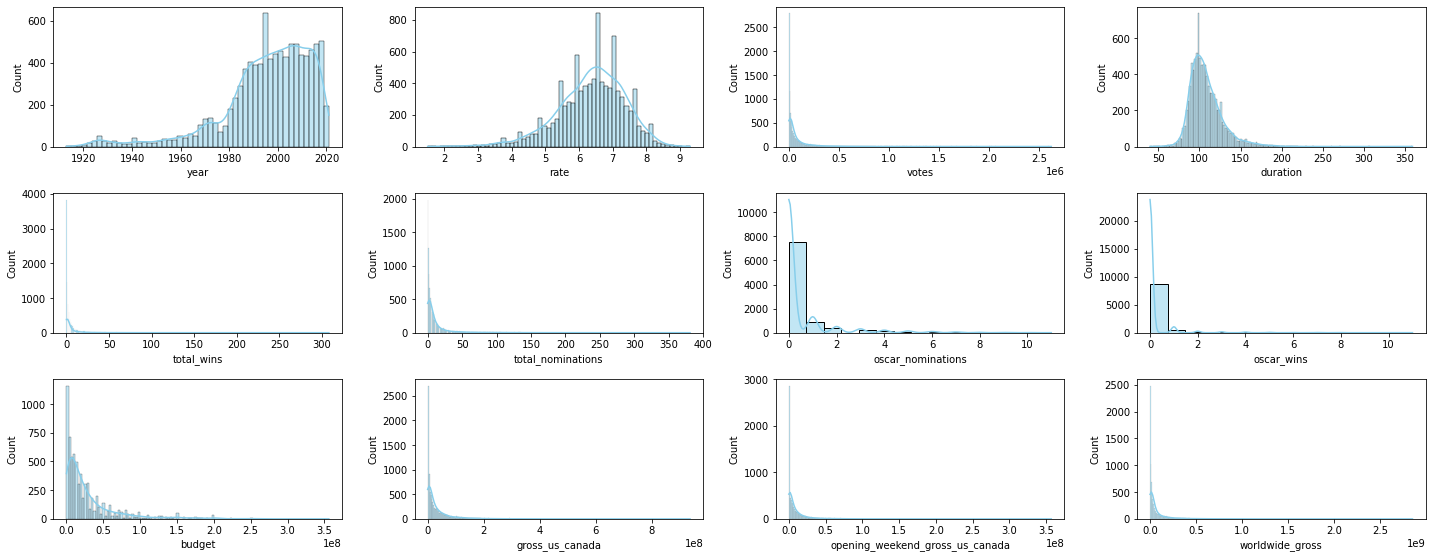

In [275]:
# adjust the figure size for better readability
plt.figure(figsize=(20,10))

features = numerical
for i in range(0, len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    sns.histplot(x=data[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

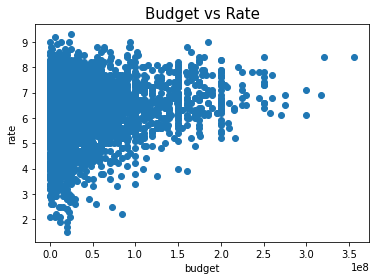

In [276]:
plt.scatter(data['budget'], data['rate'])
plt.title('Budget vs Rate', fontsize=15)
plt.xlabel('budget')
plt.ylabel('rate')
plt.show()

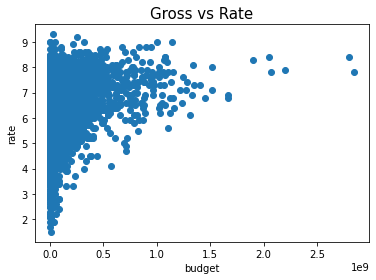

In [277]:
plt.scatter(data['worldwide_gross'], data['rate'])
plt.title('Gross vs Rate', fontsize=15)
plt.xlabel('budget')
plt.ylabel('rate')
plt.show()

In [278]:
print('Most produced year:', data['year'].mode().to_list())
print('Median of film rating:', data['rate'].median())
print('Mean of film rating:', round(data['rate'].mean(),2))
print('The longest film:', data['duration'].max(), 'minutes')
print('The shortest film:', data['duration'].min(), 'minutes')

Most produced year: [2016]
Median of film rating: 6.5
Mean of film rating: 6.37
The longest film: 359 minutes
The shortest film: 40 minutes


In [279]:
print(data['certificate'].value_counts())
print(data['duration'].mean())
print(data['duration'].median())
print(data['nudity'].mode())
print(data['violence'].mode())
print(data['profanity'].mode())
print(data['alcohol'].mode())
print(data['frightening'].mode())
print(data['aspect_ratio'].mode())
print(data['color'].mode())

R            3876
PG-13        2360
PG           1621
Not Rated     504
G             305
Approved      219
None          198
Passed        187
Unrated        64
GP             25
NC-17          18
X              16
TV-MA          10
TV-PG          10
TV-14           8
M               7
M/PG            6
TV-G            4
TV-Y7           1
Name: certificate, dtype: int64
107.97012395380867
104.0
0    Mild
dtype: object
0    Mild
dtype: object
0    Mild
dtype: object
0    Mild
dtype: object
0    Mild
dtype: object
0    1.85 : 1
dtype: object
0    Color
dtype: object


# Save Data For Next

In [280]:
data_for_next = data.copy()

data_for_next[['star1','star2', 'star3', 'star4']]= data_for_next['star'].str.split(',', 4, expand=True)
data_for_next.head()

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,star1,star2,star3,star4
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,7.8,918325,"Action, Adventure, Sci-Fi",PG-13,138,None,Moderate,...,0,1,0,0,0,0,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson
1,tt4154796,Avengers: Endgame,2019,8.4,1082885,"Action, Adventure, Drama",PG-13,181,None,Moderate,...,0,0,0,0,0,0,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
2,tt10872600,Spider-Man: No Way Home,2021,8.3,694209,"Action, Adventure, Fantasy",PG-13,148,None,Moderate,...,0,0,0,0,0,0,Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon
3,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,...,0,0,0,0,0,0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez
4,tt1825683,Black Panther,2018,7.3,736095,"Action, Adventure, Sci-Fi",PG-13,134,None,Moderate,...,0,1,0,0,0,0,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira


In [281]:
data_for_next.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           9439 non-null   object 
 1   title                            9439 non-null   object 
 2   year                             9439 non-null   int64  
 3   rate                             9439 non-null   float64
 4   votes                            9439 non-null   int64  
 5   genre                            9439 non-null   object 
 6   certificate                      9439 non-null   object 
 7   duration                         9439 non-null   int64  
 8   nudity                           9439 non-null   object 
 9   violence                         9439 non-null   object 
 10  profanity                        9439 non-null   object 
 11  alcohol                          9439 non-null   object 
 12  frightening         

In [282]:
data_for_next.to_csv('imdb processed.csv', index=False)

# Split Data : Train - Validation - Test

In [283]:
data.drop('url_id', inplace=True, axis=1)
data.drop('title', inplace=True, axis=1)
data.drop('genre', inplace=True, axis=1)
data.drop('certificate', inplace=True, axis=1)
data.drop('director', inplace=True, axis=1)
data.drop('star', inplace=True, axis=1)
data.drop('aspect_ratio', inplace=True, axis=1)
data.drop('url_image', inplace=True, axis=1)
data.drop('color', inplace=True, axis=1)
data.drop('plot', inplace=True, axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             9439 non-null   int64  
 1   rate                             9439 non-null   float64
 2   votes                            9439 non-null   int64  
 3   duration                         9439 non-null   int64  
 4   nudity                           9439 non-null   object 
 5   violence                         9439 non-null   object 
 6   profanity                        9439 non-null   object 
 7   alcohol                          9439 non-null   object 
 8   frightening                      9439 non-null   object 
 9   total_nominations                9439 non-null   int64  
 10  total_wins                       9439 non-null   int64  
 11  oscar_nominations                9439 non-null   float64
 12  oscar_wins          

In [284]:
data = data.dropna().reset_index(drop=True)

In [285]:
cols = ['nudity', 'violence', 'profanity', 'alcohol', 'frightening']
data[cols] = data[cols].replace({'None':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'No Rate':0})

data.info()
rate=data.copy()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5934 entries, 0 to 5933
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             5934 non-null   int64  
 1   rate                             5934 non-null   float64
 2   votes                            5934 non-null   int64  
 3   duration                         5934 non-null   int64  
 4   nudity                           5934 non-null   int64  
 5   violence                         5934 non-null   int64  
 6   profanity                        5934 non-null   int64  
 7   alcohol                          5934 non-null   int64  
 8   frightening                      5934 non-null   int64  
 9   total_nominations                5934 non-null   int64  
 10  total_wins                       5934 non-null   int64  
 11  oscar_nominations                5934 non-null   float64
 12  oscar_wins          

,year,rate,votes,duration,nudity,violence,profanity,alcohol,frightening,total_nominations,...,is_Horror,is_History,is_Music,is_Mystery,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western
count,5934.000000,5934.000000,5.934000e+03,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,...,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000
mean,2002.128750,6.360971,1.154396e+05,108.673913,1.003370,1.446916,1.479103,1.025278,1.286316,14.859623,...,0.096225,0.031008,0.041119,0.086788,0.183519,0.074823,0.028480,0.151163,0.015672,0.007583
std,11.105091,1.003716,1.963527e+05,18.901244,0.834525,0.978686,0.964122,0.743102,0.970711,30.519029,...,0.294925,0.173353,0.198582,0.281548,0.387124,0.263128,0.166354,0.358238,0.124215,0.086759
min,1927.000000,1.500000,1.150000e+02,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,5.800000,1.496500e+04,96.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2003.000000,6.400000,4.731400e+04,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,7.100000,1.275400e+05,118.000000,2.000000,2.000000,2.000000,1.000000,2.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,9.300000,2.619121e+06,271.000000,3.000000,3.000000,3.000000,3.000000,3.000000,381.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:
from sklearn.model_selection import train_test_split

feature = rate.drop(columns='rate')
target = rate['rate']

feature_rate_pretrain, feature_rate_test, target_rate_pretrain, target_rate_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_rate_train, feature_rate_validation, target_rate_train, target_rate_validation = train_test_split(feature_rate_pretrain, target_rate_pretrain, test_size=0.20, random_state=42)

# Multicollinearity Study

In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_rate_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,vif_score
1,year,1.496698
2,votes,2.262645
3,duration,1.725491
4,nudity,1.490770
5,violence,3.377137
6,profanity,2.028893
7,alcohol,1.594002
8,frightening,2.901310
9,total_nominations,4.837013
10,total_wins,4.766231


Observation:
* VIF Score for `total_nominations`, `total_wins`, `gross_us_canada`, `opening_weekend_gross_us_canada`, `worldwide_gross` are above 4.
* Let's check multicollinearity on heatmap correlation.

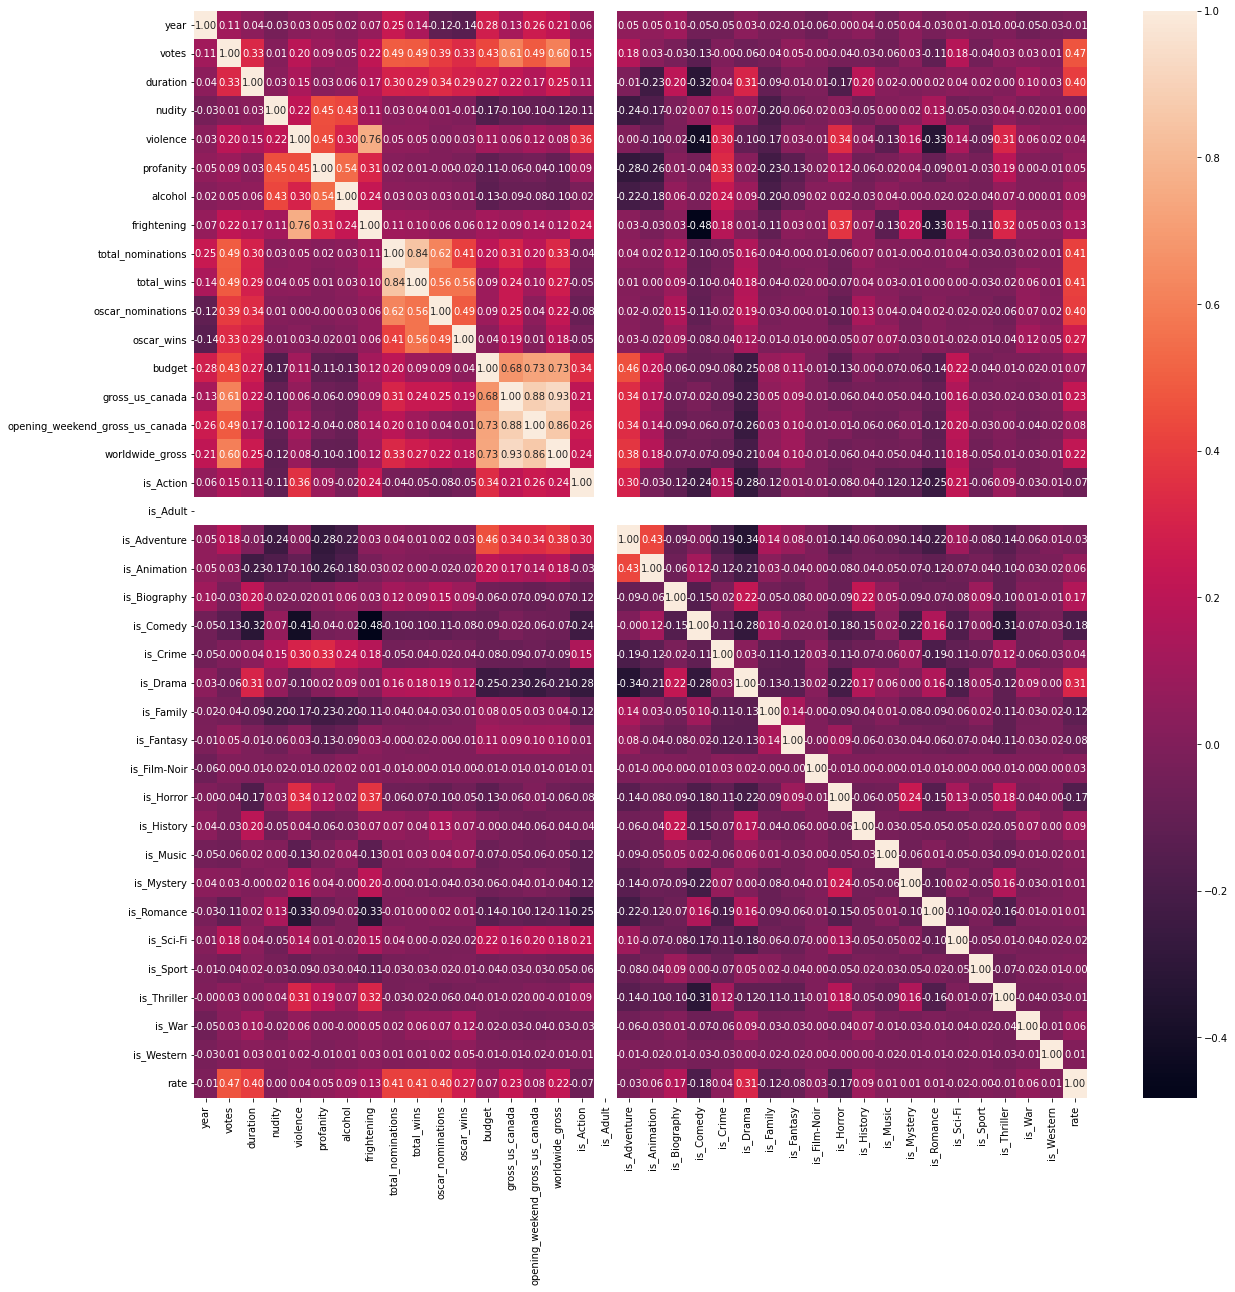

In [288]:
# heatmap correlation
rate_train = pd.concat([feature_rate_train, target_rate_train], axis=1)
corr = rate_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Observation:

* `gross_us_canada`, `opening_weekend_gross_us_canada`, and `worldwide_gross` is highly correlated each other.
* `total_nominations` and `total_wins` is highly correlated each other.
* We decide to drop `gross_us_canada`, `opening_weekend_gross_us_canada`, and `total_nominations` columns.

## Drop Multicollinear Features

In [289]:
feature_rate_train = feature_rate_train.drop(columns=['opening_weekend_gross_us_canada', 'gross_us_canada','total_nominations'])
feature_rate_validation = feature_rate_validation.drop(columns=['opening_weekend_gross_us_canada', 'gross_us_canada','total_nominations'])
feature_rate_test = feature_rate_test.drop(columns=['opening_weekend_gross_us_canada', 'gross_us_canada','total_nominations'])

# Recheck VIF

In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_rate_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,vif_score
1,year,1.345410
2,votes,2.174130
3,duration,1.720761
4,nudity,1.489584
5,violence,3.364987
6,profanity,2.014702
7,alcohol,1.593242
8,frightening,2.898401
9,total_wins,2.206258
10,oscar_nominations,1.802549
